In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.drop(['RowNumber','Surname'],axis=1,inplace=True)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\User

<AxesSubplot:xlabel='Exited', ylabel='count'>

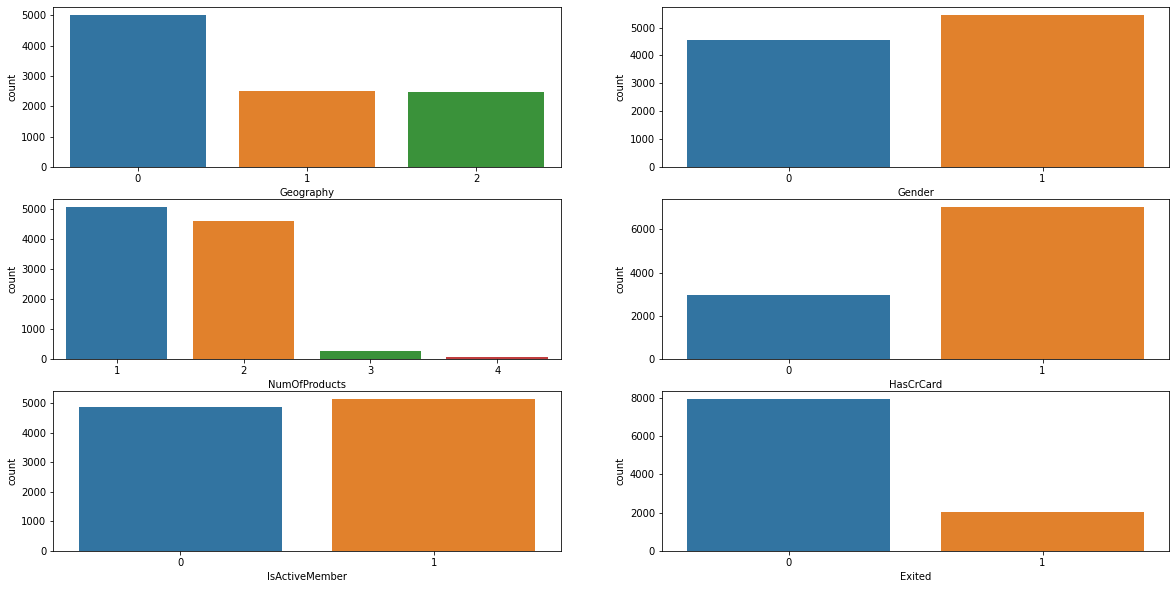

In [13]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(321)
ax1.set_xlabel("Geography")
sns.countplot(df['Geography'])

ax2 = fig.add_subplot(322)
ax2.set_xlabel("Gender")
sns.countplot(df['Gender'])

ax3 = fig.add_subplot(323)
ax3.set_xlabel("NumOfProducts")
sns.countplot(df['NumOfProducts'])

ax4 = fig.add_subplot(324)
ax4.set_xlabel("HasCrCard")
sns.countplot(df['HasCrCard'])

ax5 = fig.add_subplot(325)
ax5.set_xlabel("IsActiveMember")
sns.countplot(df['IsActiveMember'])

ax6 = fig.add_subplot(326)
ax6.set_xlabel("Exited")
sns.countplot(df['Exited'])

In [14]:
X = df.drop(['Exited'],axis=1)
X

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52


In [15]:
Y = df['Exited']
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=50)
x_train.shape, x_test.shape, y_train.shape, Y_test.shape

((7500, 11), (2500, 11), (7500,), (2500,))

In [18]:
model = keras.Sequential([
    keras.layers.Dense(units=25,activation='relu'),
    keras.layers.Dense(units=16,activation='relu'),
    keras.layers.Dense(units=1,activation='sigmoid')    
]
)

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [21]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
235/235 [==============================] - 2s 3ms/step - loss: 23954.2734 - accuracy: 0.6916
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 7132.4697 - accuracy: 0.6839
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 7005.3262 - accuracy: 0.6803
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 5850.7002 - accuracy: 0.6732
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 5958.5015 - accuracy: 0.6749
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 5626.9165 - accuracy: 0.6788
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 4015.1902 - accuracy: 0.6771
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 4929.9185 - accuracy: 0.6772
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 3764.7351 - accuracy: 0.6811
Epoch 10/100
235/235 [==============================] - 1s 3ms/

235/235 [==============================] - 1s 3ms/step - loss: 1787.2688 - accuracy: 0.6871
Epoch 78/100
235/235 [==============================] - 1s 3ms/step - loss: 1919.1270 - accuracy: 0.6761
Epoch 79/100
235/235 [==============================] - 1s 3ms/step - loss: 2304.8557 - accuracy: 0.6741
Epoch 80/100
235/235 [==============================] - 1s 3ms/step - loss: 2609.2773 - accuracy: 0.6856
Epoch 81/100
235/235 [==============================] - 1s 3ms/step - loss: 2462.2463 - accuracy: 0.6783
Epoch 82/100
235/235 [==============================] - 1s 3ms/step - loss: 1934.6133 - accuracy: 0.6841
Epoch 83/100
235/235 [==============================] - 1s 3ms/step - loss: 1604.2086 - accuracy: 0.6864A: 0s - loss: 1432.8907 - accuracy
Epoch 84/100
235/235 [==============================] - 1s 3ms/step - loss: 2719.1580 - accuracy: 0.6743
Epoch 85/100
235/235 [==============================] - 1s 3ms/step - loss: 2426.3865 - accuracy: 0.6820
Epoch 86/100
235/235 [============

In [25]:
model.evaluate(x_test,Y_test)

79/79 [==============================] - 1s 2ms/step - loss: 412.9539 - accuracy: 0.7936


[412.9539489746094, 0.7936000227928162]

In [26]:
preds = model.predict(x_test)
preds

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [28]:
pred = []
for p in preds:
    if p[0]>=0.5:
        pred.append(1)
    else:
        pred.append(0)
pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1999
           1       0.17      0.01      0.02       501

    accuracy                           0.79      2500
   macro avg       0.49      0.50      0.45      2500
weighted avg       0.67      0.79      0.71      2500



In [31]:
print(accuracy_score(Y_test,pred))

0.7936


AxesSubplot(0.125,0.125;0.62x0.755)


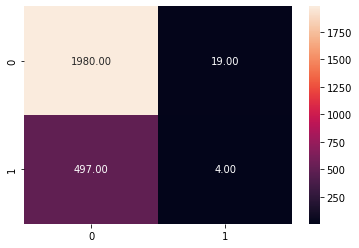

In [32]:
print(sns.heatmap(confusion_matrix(Y_test,pred),annot=True,fmt='0.2f'))